# Bài tập 9 - Color Segmentation (Cách 1)

Bước 1: Load 1 ảnh chroma key không có người hoặc có người cũng được.

Bước 2: Dùng chuột để khoanh vùng có nền xanh (đọt chuối)

Bước 3: Trong vùng đã khoanh, thống kê:

r_min, r_max

g_min, g_max

b_min, b_max

Bước 4: Load một tấm ảnh chroma key bất kỳ

Bước 5: Loại bỏ những điểm ảnh (r, g, b) có giá trị màu không thỏa mãn:

r_min < r <  r_max, và

g_min < g <  g_max, và

b_min < b < b_max

Chú ý: có thể thay bằng nền khác cho đẹp.



**Ví dụ**

Input :

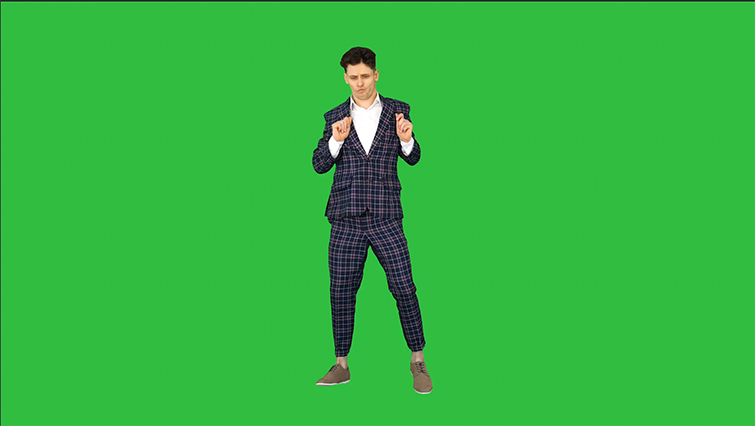

Output:

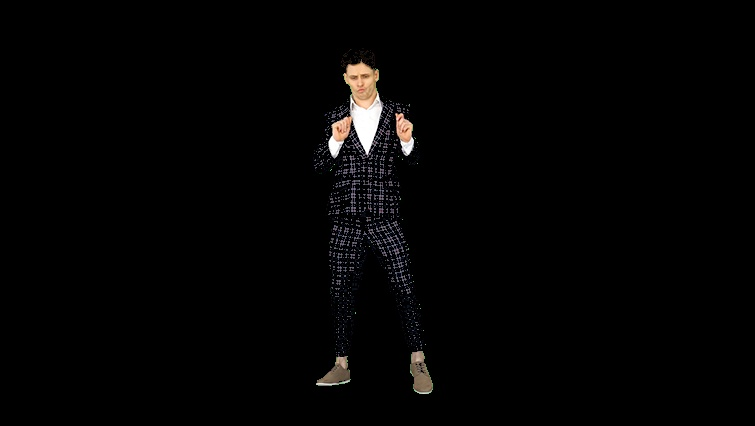

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [8]:
def sol(img_path):
  #Đọc ảnh đầu vào và lấy các giá trị chiều dài rộng
  img = cv2.imread(img_path)
  h, w, _ = img.shape

  #Xác định phần background
  bg = img[:100, :100, ]
  # xác định tham số cần thêm để kết quả tốt nhất
  d = 15
  ### BEGIN SOLUTION
  # xác định các chặn trên dưới của background
  b_max = np.max(bg[:,:,0]) + d
  b_min = np.min(bg[:,:,0]) - d
  g_max = np.max(bg[:,:,1]) + d
  g_min = np.min(bg[:,:,1]) - d
  r_max = np.max(bg[:,:,2]) + d
  r_min = np.min(bg[:,:,2]) - d

  # Tạo mask 
  bg_lower = np.array([b_min, g_min, r_min])
  bg_upper= np.array([b_max, g_max, r_max])
  mask = cv2.inRange(img, bg_lower, bg_upper)
  # thực hiện phép bitwwise_and giữa ảnh đầu vào và mask
  res = cv2.bitwise_and(img, img, mask = mask)
  # trừ ảnh ban đầu với phần bù là ảnh sau khi bitwwse giữa mask và ảnh +> kết quả
  result = img - res
  ###END SOLUTION

  return result

<function matplotlib.pyplot.show(*args, **kw)>

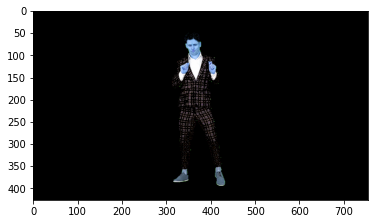

In [9]:
# Test thu ảnh

res = sol('chromakey.jpg')
plt.imshow(res)
plt.show

In [ ]:
### BEGIN HIDDEN TESTS
def sol_for_test(img_path):
  #Đọc ảnh đầu vào và lấy các giá trị chiều dài rộng
  img = cv2.imread(img_path)
  h, w, _ = img.shape

  #Xác định phần background
  bg = img[:100, :100, ]
  # xác định tham số cần thêm để kết quả tốt nhất
  d = 15

  # xác định các chặn trên dưới của background
  b_max = np.max(bg[:,:,0]) + d
  b_min = np.min(bg[:,:,0]) - d
  g_max = np.max(bg[:,:,1]) + d
  g_min = np.min(bg[:,:,1]) - d
  r_max = np.max(bg[:,:,2]) + d
  r_min = np.min(bg[:,:,2]) - d

  # Tạo mask 
  bg_lower = np.array([b_min, g_min, r_min])
  bg_upper= np.array([b_max, g_max, r_max])
  mask = cv2.inRange(img, bg_lower, bg_upper)
  # thực hiện phép bitwwise_and giữa ảnh đầu vào và mask
  res = cv2.bitwise_and(img, img, mask = mask)
  # trừ ảnh ban đầu với phần bù là ảnh sau khi bitwwse giữa mask và ảnh +> kết quả
  result = img - res
 

  return result


img_path = ''
assert np.all(sol(img_path) == sol_for_test(img_path))
### END HIDDEN TESTS